In [107]:
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf 
import datetime as dt 
import os 

#Create directory to store today's plots
_today = dt.datetime.today().strftime('%Y-%m-%d')
directory = f'/Users/talhajamal/Desktop/Code/Daily_Market_Update/data/{_today}'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Get SP500 Tickers
sp500 = pd.read_csv('/Users/talhajamal/Desktop/Code/Daily_Market_Update/data/sp500.csv')
sp500_tickers = ','.join(sp500['Symbol']).replace(',',' ')

# 1 Year Data
data = yf.download(sp500_tickers, period='2y')

# Performance Metrics
performance_metrics = {
    '1d': data['Adj Close'].pct_change(fill_method=None).tail(1) * 100,
    '1w': data['Adj Close'].pct_change(fill_method=None, periods=5).tail(1) * 100,
    '1m': data['Adj Close'].pct_change(fill_method=None, periods=21).tail(1) * 100,
    '1y': data['Adj Close'].pct_change(fill_method=None, periods=252).tail(1) * 100
}

# Find top 10 performing stocks for each period
top_performers = {period: metric.iloc[0].nlargest(10) for period, metric in performance_metrics.items()}

# Find worst 10 performing stocks for each period
worst_performers = {period: metric.iloc[0].nsmallest(10) for period, metric in performance_metrics.items()}

# df for each best period
best_one_day_performance = top_performers['1d']
best_one_week_performance = top_performers['1w']
best_one_month_performance = top_performers['1m']
best_one_year_performance = top_performers['1y']

# df for each worst period
worst_one_day_performance = worst_performers['1d']
worst_one_week_performance = worst_performers['1w']
worst_one_month_performance = worst_performers['1m']
worst_one_year_performance = worst_performers['1y']

[*********************100%%**********************]  503 of 503 completed


2 Failed downloads:
['BRK.B']: Exception('%ticker%: No data found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=2y)')


  Ticker  1D Return
0   ANSS  18.082863
1   MRNA   4.091702
2    ALB   3.190099
3   ALLE   2.528250
4    BMY   2.009369
5   INTC   1.954117
6   INCY   1.880369
7   RVTY   1.843794
8   EXPD   1.768379
9   AMGN   1.729144


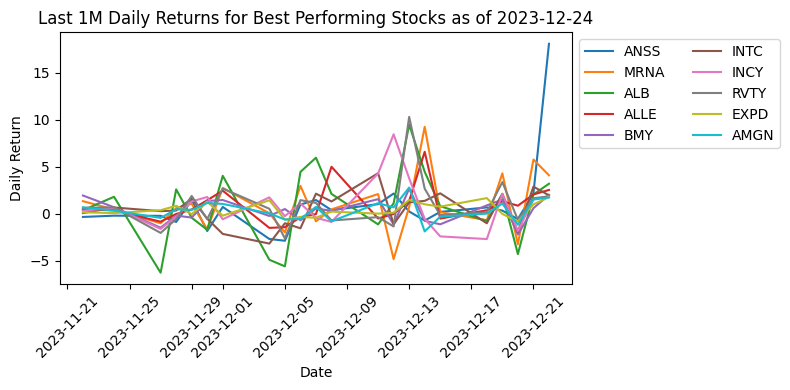

In [109]:
# Best 1D Performance
best_one_day = best_one_day_performance.reset_index()
best_one_day.columns = ['Ticker', '1D Return']
print(best_one_day)

# Plot of best performing stocks over 1 Day
plt.figure(figsize=(8,4))
for ticker, ret in best_one_day_performance.items():
    #Calculate Daily Return for last month
    plt.plot(data['Adj Close'][ticker].pct_change().tail(22) * 100, label=ticker)
plt.title('Last 1M Daily Returns for Best Performing Stocks as of '+_today)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Daily Return')
plt.legend(loc='upper left', ncol=2, bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

  Ticker  1D Return
0    NKE -11.825674
1   SNPS  -6.339738
2    VFC  -3.227480
3    CMI  -2.872949
4    KMX  -2.584349
5    CEG  -2.518803
6    RMD  -1.950691
7    WBD  -1.914703
8    CZR  -1.783089
9     RL  -1.656299


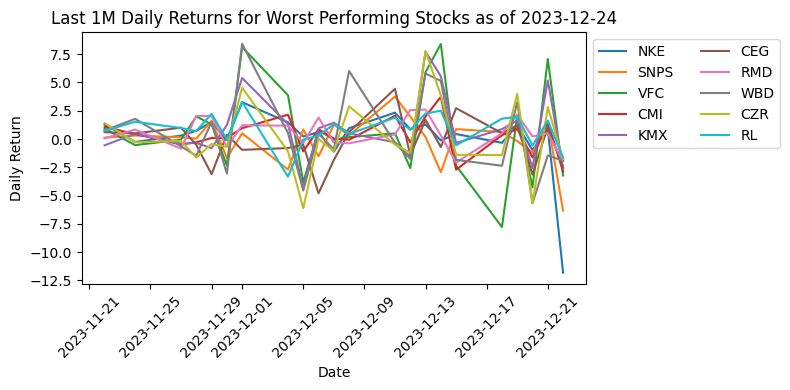

In [110]:
# Worst 1D Performance
worst_one_day = worst_one_day_performance.reset_index()
worst_one_day.columns = ['Ticker', '1D Return']
print(worst_one_day)

# Plot of best performing stocks over 1 Day
plt.figure(figsize=(8,4))
for ticker, ret in worst_one_day_performance.items():
    #Calculate Daily Return for last month
    plt.plot(data['Adj Close'][ticker].pct_change().tail(22) * 100, label=ticker)
plt.title('Last 1M Daily Returns for Worst Performing Stocks as of '+_today)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Daily Return')
plt.legend(loc='upper left', ncol=2, bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

ANSS 21.156127358910037
MRNA 10.324377436188193
ILMN 10.149489914042364
JCI 8.199853478958175
ENPH 8.12621648887526
ALLE 7.317908738234302
GOOGL 6.704373288420795
PFE 6.646641057245595
GOOG 6.634791636122106
ALGN 6.611505812922003


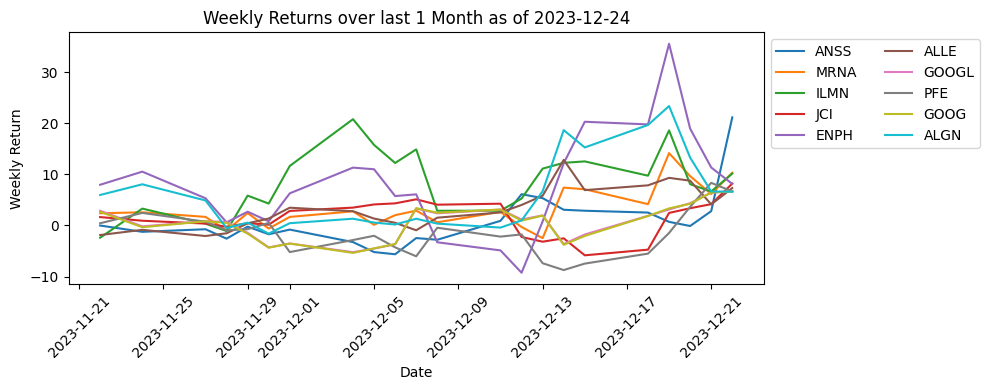

In [57]:
# Plot of best performing stocks over 1 Week
plt.figure(figsize=(10,4))
for ticker, ret in one_week_performance.items():
    plt.plot(data['Adj Close'][ticker].pct_change(periods=5).tail(22) * 100, label=ticker)
plt.title('Weekly Returns over last 1 Month as of ' + _today)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Weekly Return')
plt.legend(loc='upper left', ncol=2, bbox_to_anchor=(1,1))
plt.tight_layout()
_filename = '1W_performance.png'
_full_path = os.path.join(directory, _filename)
plt.savefig(_full_path)
plt.show()

NCLH 45.587215170989694
BBWI 45.52515793438978
ILMN 43.20785284446627
ENPH 33.72256444516255
BXP 31.289372633525538
CCL 30.82239084894478
GM 28.551174518230592
DFS 28.356651204944928
CMA 28.141767256543847
ZION 27.86980585618668


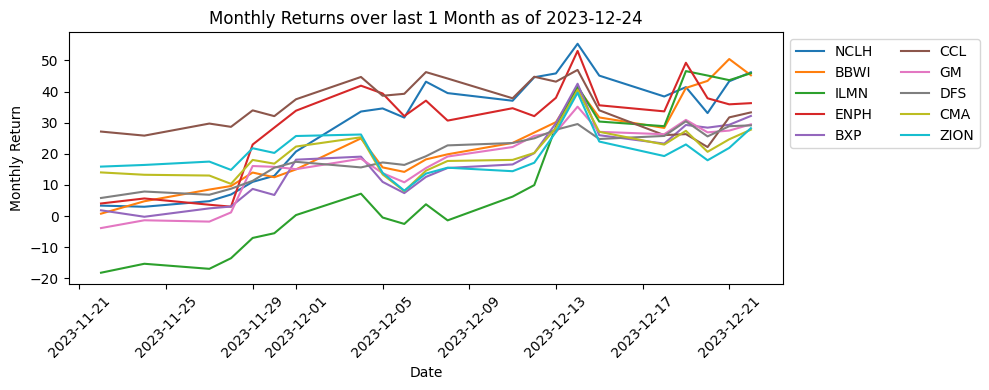

In [58]:
# Plot of best performing stocks over 1 Month
plt.figure(figsize=(10,4))
for ticker, ret in one_month_performance.items():
    print(ticker, ret)
    plt.plot(data['Adj Close'][ticker].pct_change(periods=22).tail(22) * 100, label=ticker)
plt.title('Monthly Returns over last 1 Month as of '+_today)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Monthly Return')
plt.legend(loc='upper left', ncol=2, bbox_to_anchor=(1,1))
plt.tight_layout()
_filename = '1M_performance.png'
_full_path = os.path.join(directory, _filename)
plt.savefig(_full_path)
plt.show()

NVDA 196.0527323693486
META 195.08183729526502
BLDR 152.819352434538
RCL 147.46188634529113
UBER 143.33595267850106
PHM 125.87009677331436
CCL 123.23114772460943
AMD 106.26478350184021
AVGO 104.46445553507732
CRM 104.40521112811867


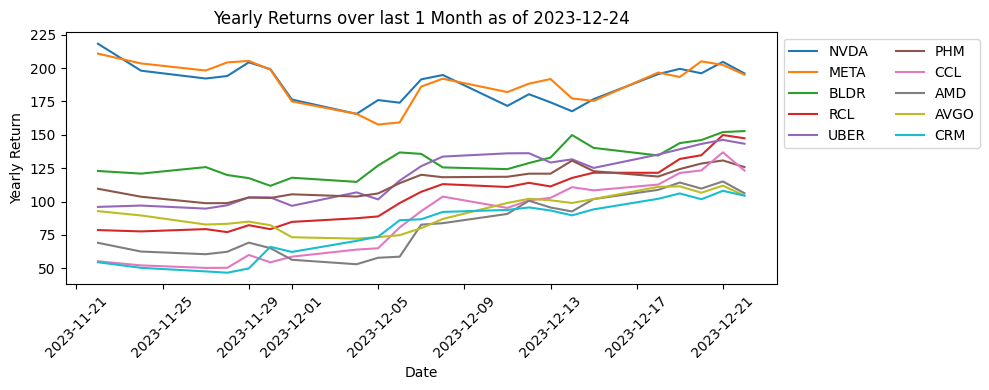

In [59]:
# Plot of best performing stocks over 1 Year
plt.figure(figsize=(10,4))
for ticker, ret in one_year_performance.items():
    print(ticker, ret)
    plt.plot(data['Adj Close'][ticker].pct_change(periods=252).tail(22) * 100, label=ticker)
plt.title('Yearly Returns over last 1 Month as of '+_today)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Yearly Return')
plt.legend(loc='upper left', ncol=2, bbox_to_anchor=(1,1))
plt.tight_layout()
_filename = '1Y_performance.png'
_full_path = os.path.join(directory, _filename)
plt.savefig(_full_path)
plt.show()